In [2]:
#Let's take hipparcos dataset containing distances of stars and create a model describing 
#the probability distribution of the distances
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

9998
9998


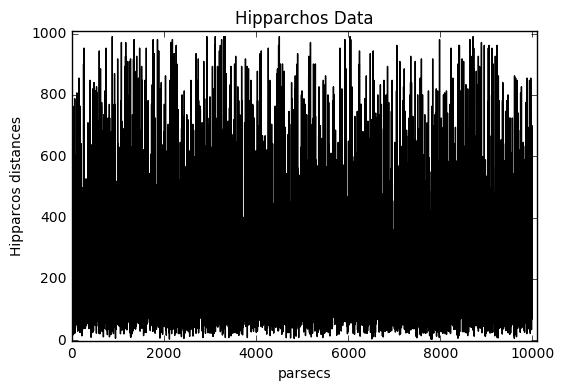

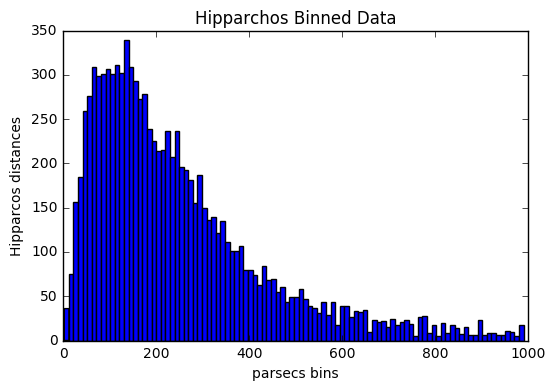

In [3]:
#data = pd.read_csv('hipparchos_subsample.dat', header = 'infer', delimiter = '\t')

#print data
#d = pd.DataFrame(data, index=index)
#data_range = np.arange(0,1000)


data = np.loadtxt('hipparchos_subsample.dat')
data_range = np.arange(0,9998)
print len(data_range)
print len(data)
plt.plot(data_range, data, color='black')
plt.title('Hipparchos Data')
plt.xlabel('parsecs'); plt.ylabel('Hipparcos distances')
plt.xlim(-1,10100); plt.ylim(-1,1010)
plt.show()

plt.hist(data, bins=100)
plt.title('Hipparchos Binned Data')
plt.xlabel('parsecs bins'); plt.ylabel('Hipparcos distances')
plt.show()

100
100
hipparchos counts: [ 25  61 149 179 248 278 302 300 306 307 312 313 303 337 328 278 283 290
 243 230 214 215 243 210 226 215 190 176 174 173 151 131 134 136 141 112
  94  95 109  77  91  64  75  66  69  77  65  41  44  54  53  61  38  39
  47  33  31  36  36  34  33  32  28  33  41  14  19  20  31  15  24  18
  21  14  19  14  26   8  28   1  22  20   9   9  23   7  15   6   6  10
  19   8   8   6   6  11  10   5   9   8]
bins: [    0.    10.    20.    30.    40.    50.    60.    70.    80.    90.
   100.   110.   120.   130.   140.   150.   160.   170.   180.   190.
   200.   210.   220.   230.   240.   250.   260.   270.   280.   290.
   300.   310.   320.   330.   340.   350.   360.   370.   380.   390.
   400.   410.   420.   430.   440.   450.   460.   470.   480.   490.
   500.   510.   520.   530.   540.   550.   560.   570.   580.   590.
   600.   610.   620.   630.   640.   650.   660.   670.   680.   690.
   700.   710.   720.   730.   740.   750.   760.   770.   780.

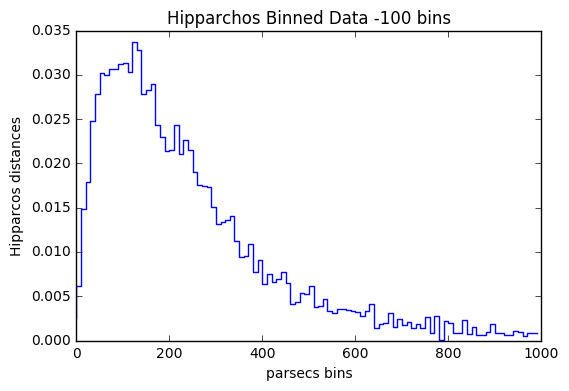

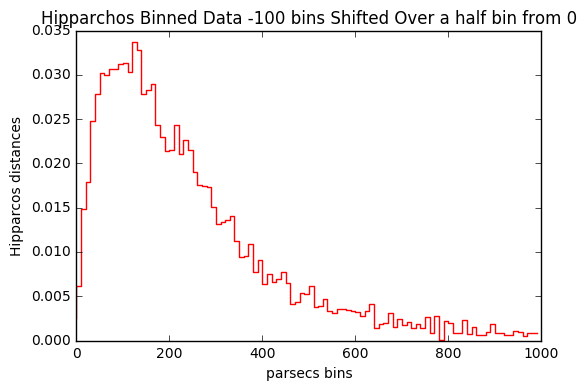

50
50


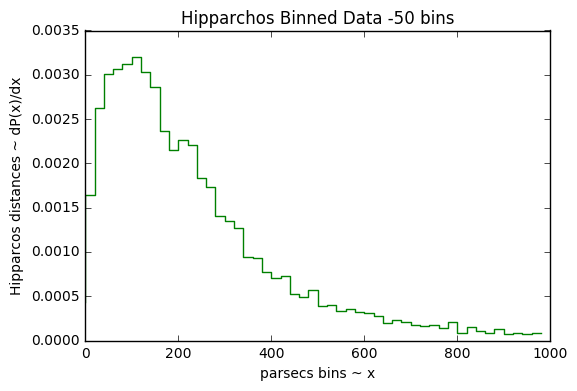

In [4]:
#Normalizing Data:
bins0 = np.linspace(0,1000,101) #start, stop, stepsize
counts0 = np.histogram(data, bins0)

bins = bins0[0:-1] #removes last element of bins

datalength = len(data)*1.0
counts = counts0[0]/datalength
print len(counts); print len(bins)

print "hipparchos counts:", counts0[0]
print "bins:", bins0
plt.step(bins, counts, color='blue')
plt.title('Hipparchos Binned Data -100 bins')
plt.xlabel('parsecs bins'); plt.ylabel('Hipparcos distances')

plt.show()
#^^^^ NOTE: At 0 there's about a half bin. We need to shift it over. EDIT: This happens for 
#                                                                          plt.step ONLY!!!
dmax = np.max(bins0); dmin =np.min(bins0)
binshift = (dmax-dmin)/(2.0*len(bins0))

bins1 = bins0[0:-1]#+binshift 
plt.step(bins1, counts, color='red')
plt.title('Hipparchos Binned Data -100 bins Shifted Over a half bin from 0')
plt.xlabel('parsecs bins'); plt.ylabel('Hipparcos distances')
plt.show()

#Example: 50 bins vs 100 bins
bins50 = np.linspace(0,1000,51)
dmax = np.max(bins50); dmin =np.min(bins50); binwidth = np.float(dmax-dmin)/50
binshift50 = (dmax-dmin)/(2.0*len(bins50))
binsfifty = bins50[0:-1] #+ binshift50
counts50 = np.histogram(data, bins50)
countsfifty = counts50[0]/(len(data)*1.0)/(binwidth)

print len(binsfifty); print len(countsfifty)
plt.step(binsfifty, countsfifty, color='green')
plt.title('Hipparchos Binned Data -50 bins')
plt.xlabel('parsecs bins ~ x'); plt.ylabel('Hipparcos distances ~ dP(x)/dx')
plt.show()

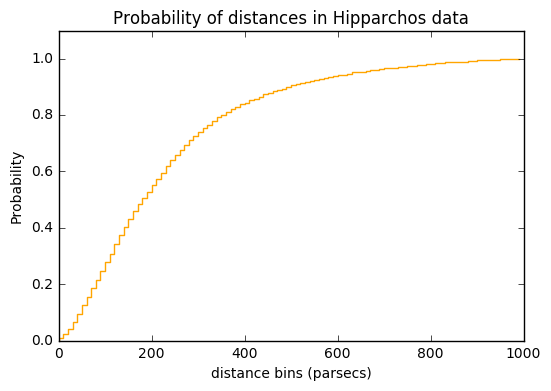

In [5]:
#Cumulative Probability:
CumulSum = np.cumsum(counts)
dmax = np.max(bins0); dmin =np.min(bins0)
binshift = (dmax-dmin)/(2.0*len(bins0))

bins1 = bins0[0:-1]#+binshift 
plt.step(bins1, CumulSum, color='Orange')
plt.title('Probability of distances in Hipparchos data')
plt.xlabel('distance bins (parsecs)'); plt.ylabel('Probability')
plt.ylim(0,1.1)
plt.show()

In [6]:
#Basic Statistics: Mean, Standard Deviation, Skewness, Kurtosis AKA 1st - 4th moments:
N = len(data)
Mean = np.sum(data/N); print Mean

std_dev = np.sqrt(np.sum((data-Mean)**2)/(N-1)); print std_dev

Skewness = np.sum((data-Mean)**3)/(N*(std_dev**3)); print Skewness

Kurtosis = np.sum((data-Mean)**4)/(N*(std_dev**4))-3; print Kurtosis

#Median
sorted_data = np.sort(data)
Median  = sorted_data[(len(data))/2]
print Median
print np.median(data)

247.775356071
188.709040028
1.41723317781
1.94316080512
196.5
196.5


In [7]:
#Percentiles
percentile16 = np.percentile(data, 16); print percentile16
percentile84 = np.percentile(data, 84); print percentile84

81.77
413.2


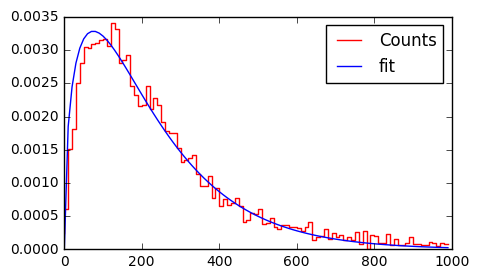

Binned Mean
247.775356071
Binned Sigma
173.628517155


In [8]:
#Fitting to approximate a Gaussian
y = np.sqrt(bins1)*np.exp((-1.0*bins1/150))
#print len(y); print len(bins1); 
dmax = np.max(bins1); dmin =np.min(bins1); binwidth = np.float((dmax-dmin)/100)
normalized_y = y/(np.sum(y)*binwidth)
counts_one_hundred = counts/binwidth


fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'blue', label = 'fit')
ax.legend(loc='best')
plt.show()


#Binned Mean
print('Binned Mean'); print np.mean(data)
BinMean= np.sum(normalized_y*bins1*binwidth)
n = len(data)

print('Binned Sigma'); sigma = np.sqrt(np.sum(((bins1-BinMean)**2)*(normalized_y*binwidth))) ; print sigma

In [9]:
#Binned Median
prob = 0
for i in range(len(bins1)):
    prob = prob + normalized_y[i]*binwidth 
    if prob<0.5:
        binFIFTY = i
print binFIFTY       
BinMedian = bins1[binFIFTY]; print BinMedian
print np.median(data)

17
170.0
196.5


[ 0.          0.01831877  0.04255463  0.07032304  0.10031932  0.13169329
  0.16384523  0.19633358  0.22882514  0.26106505  0.29285718  0.32405061
  0.35452986  0.38420771  0.41301961  0.44091937  0.46787576  0.49386978
  0.51889237  0.54294262  0.5660263   0.58815453  0.6093428   0.62961006
  0.64897801  0.66747049  0.68511294  0.70193198  0.71795503  0.73321004
  0.74772517  0.76152864  0.7746485   0.78711253  0.79894807  0.81018194
  0.82084039  0.83094897  0.84053257  0.84961529  0.85822048  0.86637071
  0.87408773  0.88139249  0.88830515  0.89484506  0.9010308   0.90688017
  0.9124102   0.9176372   0.92257673  0.92724368  0.93165224  0.93581595
  0.9397477   0.94345978  0.94696389  0.95027114  0.95339213  0.95633689
  0.95911498  0.96173548  0.96420698  0.96653766  0.96873527  0.97080714
  0.97276025  0.97460118  0.97633619  0.97797119  0.9795118   0.9809633
  0.98233072  0.98361881  0.98483204  0.98597468  0.98705072  0.98806397
  0.98901801  0.98991622  0.99076181  0.99155779  0.

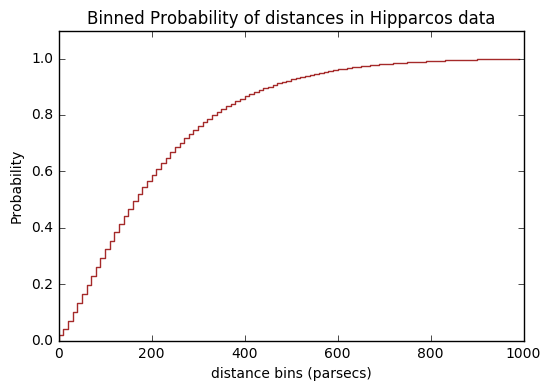

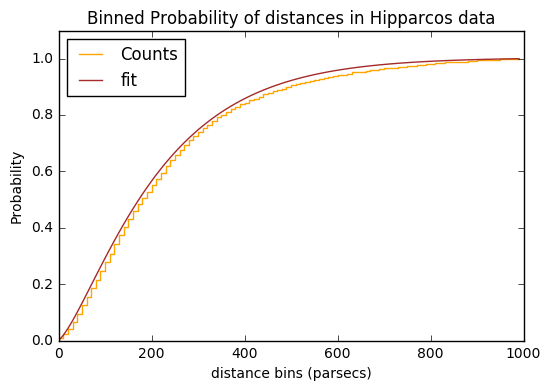

In [10]:
#Binned Cumulative Probability(SUM):

BinCumulSum = np.cumsum(normalized_y*binwidth)
print BinCumulSum

plt.step(bins1, BinCumulSum, color='brown')
plt.title('Binned Probability of distances in Hipparcos data')
plt.xlabel('distance bins (parsecs)'); plt.ylabel('Probability')
plt.ylim(0,1.1)
plt.show()

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, CumulSum, color = 'orange', label='Counts')
ax.plot(bins1, BinCumulSum, color = 'brown', label = 'fit')
plt.title('Binned Probability of distances in Hipparcos data')
plt.xlabel('distance bins (parsecs)'); plt.ylabel('Probability')
plt.legend(loc='best')
plt.ylim(0,1.1)
plt.show()

In [11]:
#---------------------------------------Day 2-----------------------------------------------
# Attempting a K-S Test. Finding the maximum difference in probability (y-axis) in every bin.
ProbDiff = BinCumulSum - CumulSum
print ProbDiff.max()
print np.argmax(np.abs(ProbDiff)) # returns the index number of the maximum element of this ProbDiff array
print bins1[np.argmax(np.abs(ProbDiff))]

0.0461681901595
12
120.0
